# Solução da Questão 3 da Lista 1 de Deep Leaning

### PPGI - Programa de Pós-Graduação em Informática
#### Professor: Tiago Maritán

### Passo 1: Geração de Dados

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from random import *

In [3]:
def gerar_pontos(n):
    lista = []
    while(len(lista) < n):
        contador = 0
        x = uniform(-1,1)
        y = uniform(-1,1)
        if(x**2+y**2 <=1):
            lista.append([x,y])
            contador += 1
    arr = np.array(lista)
    return arr
lista = gerar_pontos(10000)

In [4]:
def rotular_pontos(arr):
    regiao = []
    for i,v in enumerate(arr):
        #primeiro quadrante
        if(v[0] > 0 and v[1] > 0):
            if(v[0] + v[1] <= 1):
                area = "C1"
            else:
                area = "C5"
        #segundo quadrante
        if(v[0] < 0 and v[1] > 0):
            if(-v[0] + v[1] <= 1):
                area = "C2"
            else:
                area = "C6"
        #terceiro quadrante
        if(v[0] < 0 and v[1] < 0):
            if(-v[0] - v[1] <= 1):
                area = "C3"
            else:
                area = "C7"
        #quarto quadrante
        if(v[0] > 0 and v[1] < 0):
            if(v[0] - v[1] <= 1):
                area = "C4"
            else:
                area = "C8"
        regiao.append(area)
    x = arr[:,0]
    y = arr[:,1]
    d = {'X':arr[:,0],'Y':arr[:,1],'label':regiao}
    df = pd.DataFrame(data=d)
    return df

df = rotular_pontos(lista)

In [5]:
fig = px.scatter(df,x='X',y='Y',color='label')

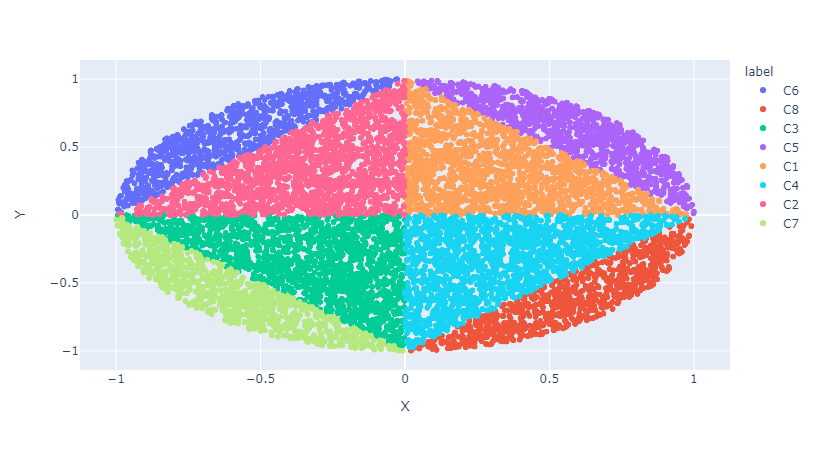

In [6]:
fig.show()

## Passo 2: Categorização dos dados e criação dos modelos

In [7]:
labelencoder = LabelEncoder()

In [8]:
X=df.iloc[:,0:2]
y=df['label']
y=labelencoder.fit_transform(y)
y_train = tf.keras.utils.to_categorical(y, num_classes=8)

## Modelo 1: Vanilla Gradient Descent, sem o termo de momento. (Regra Delta convencional) 

In [9]:
def vanilla_model():
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Dense(8, input_dim=2, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0), metrics=['accuracy'])
	return model

model_vanilla = vanilla_model()
model_vanilla.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_vanilla.fit(X, y_train, verbose=1, epochs=50)

Epoch 1/50
313/313 [==============================] - 1s 882us/step - loss: 2.0154 - accuracy: 0.1755
Epoch 2/50
313/313 [==============================] - 0s 930us/step - loss: 1.8818 - accuracy: 0.3676
Epoch 3/50
313/313 [==============================] - 0s 1ms/step - loss: 1.7758 - accuracy: 0.4528
Epoch 4/50
313/313 [==============================] - 0s 916us/step - loss: 1.6895 - accuracy: 0.4856
Epoch 5/50
313/313 [==============================] - 0s 955us/step - loss: 1.6177 - accuracy: 0.5401
Epoch 6/50
313/313 [==============================] - 0s 993us/step - loss: 1.5570 - accuracy: 0.5838
Epoch 7/50
313/313 [==============================] - 0s 996us/step - loss: 1.5049 - accuracy: 0.5990
Epoch 8/50
313/313 [==============================] - 0s 861us/step - loss: 1.4597 - accuracy: 0.6098
Epoch 9/50
313/313 [==============================] - 0s 1ms/step - loss: 1.4199 - accuracy: 0.6156
Epoch 10/50
313/313 [==============================] - 0s 1ms/step - loss: 1.3847 - ac

In [25]:
lista_teste = gerar_pontos(5000)
df_teste = rotular_pontos(lista_teste)
X_teste=df_teste.iloc[:,0:2]

y_pred = model_vanilla.predict(X_teste)
y_pred_class = np.argmax(y_pred, axis=1)
df_teste['label_pred'] = y_pred_class
df_teste['label']=labelencoder.fit_transform(df_teste['label'])
erros = np.where((df_teste['label'] != df_teste['label_pred']),1,0)
erro_percentual = (erros.sum()/len(erros))*100
print(f"Percentual de erros do modelo no conjunto de teste: {round(erro_percentual,2)}%")

Percentual de erros do modelo no conjunto de teste: 16.42%


In [38]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(df_teste['label'], df_teste['label_pred'])
confusion_matrix = confusion_matrix.astype(int)

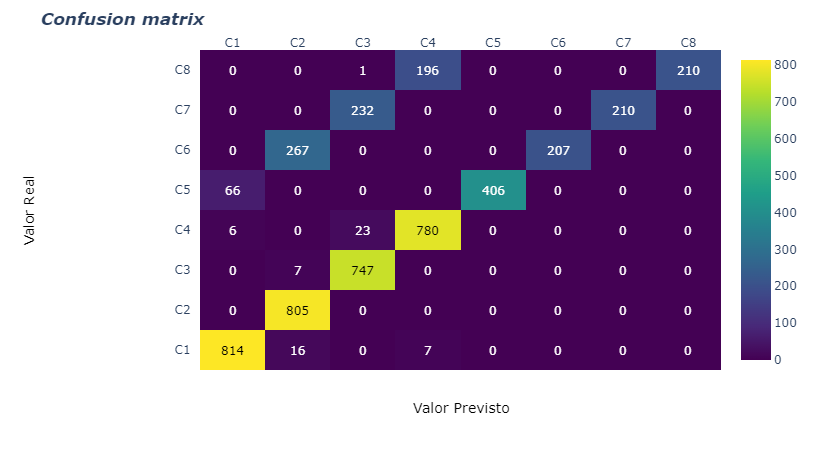

In [44]:
import plotly.figure_factory as ff
def plot_confusion_matrix(z):
    x = ['C1', 'C2', 'C3', 'C4','C5','C6','C7','C8']
    y =  ['C1', 'C2', 'C3', 'C4','C5','C6','C7','C8']

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Valor Previsto",
                            xref="paper",
                            yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=-0.35,
                            y=0.5,
                            showarrow=False,
                            text="Valor Real",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    # adjust margins to make room for yaxis title
    fig.update_layout(margin=dict(t=50, l=200))

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()
plot_confusion_matrix(confusion_matrix)

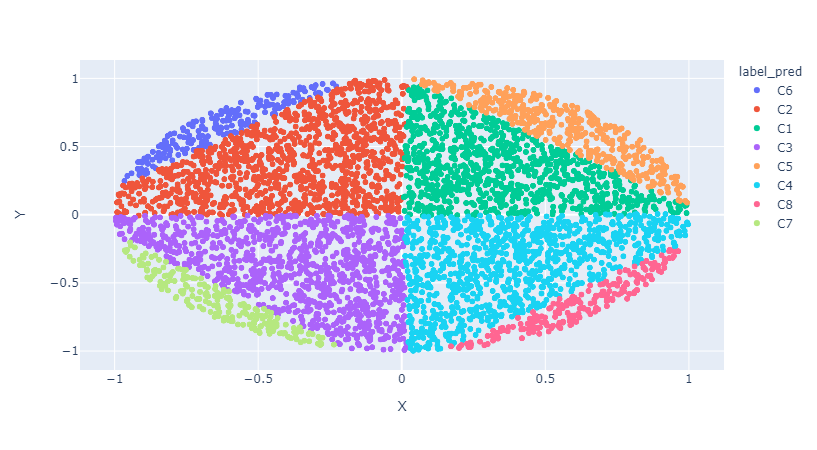

In [42]:
df_teste['label_pred']=labelencoder.inverse_transform(df_teste['label_pred'])
df_teste['label']=labelencoder.inverse_transform(df_teste['label'])
fig2 = px.scatter(df_teste,x='X',y='Y',color='label_pred')
fig2.show()

## Modelo 2: Com o gradiente descendente com o termo do momento

In [45]:
def momentum_model():
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Dense(8, input_dim=2, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.9), metrics=['accuracy'])
	return model

model_momentum = momentum_model()
model_momentum.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 24        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_momentum.fit(X, y_train, verbose=1, epochs=50)

Epoch 1/50
313/313 [==============================] - 1s 876us/step - loss: 1.7208 - accuracy: 0.4563
Epoch 2/50
313/313 [==============================] - 0s 850us/step - loss: 1.2734 - accuracy: 0.6140
Epoch 3/50
313/313 [==============================] - 0s 836us/step - loss: 1.1106 - accuracy: 0.6593
Epoch 4/50
313/313 [==============================] - 0s 867us/step - loss: 1.0162 - accuracy: 0.7214
Epoch 5/50
313/313 [==============================] - 0s 870us/step - loss: 0.9500 - accuracy: 0.7969
Epoch 6/50
313/313 [==============================] - 0s 911us/step - loss: 0.8995 - accuracy: 0.8543
Epoch 7/50
313/313 [==============================] - 0s 881us/step - loss: 0.8587 - accuracy: 0.8801
Epoch 8/50
313/313 [==============================] - 0s 890us/step - loss: 0.8249 - accuracy: 0.9040
Epoch 9/50
313/313 [==============================] - 0s 877us/step - loss: 0.7957 - accuracy: 0.9236
Epoch 10/50
313/313 [==============================] - 0s 990us/step - loss: 0.770

In [47]:
lista_teste = gerar_pontos(5000)
df_teste = rotular_pontos(lista_teste)
X_teste=df_teste.iloc[:,0:2]

y_pred = model_vanilla.predict(X_teste)
y_pred_class = np.argmax(y_pred, axis=1)
df_teste['label_pred'] = y_pred_class
df_teste['label']=labelencoder.fit_transform(df_teste['label'])
erros = np.where((df_teste['label'] != df_teste['label_pred']),1,0)
erro_percentual = (erros.sum()/len(erros))*100
print(f"Percentual de erros do modelo no conjunto de teste: {round(erro_percentual,2)}%")

Percentual de erros do modelo no conjunto de teste: 16.6%


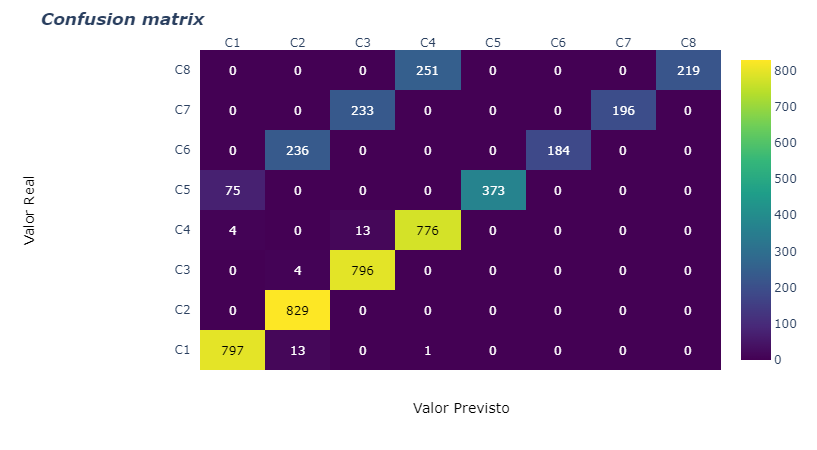

In [48]:
confusion_matrix = metrics.confusion_matrix(df_teste['label'], df_teste['label_pred'])
confusion_matrix = confusion_matrix.astype(int)
plot_confusion_matrix(confusion_matrix)

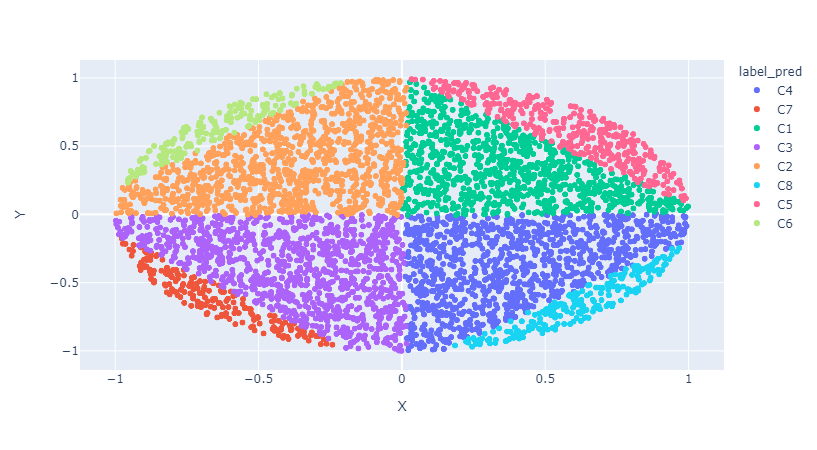

In [49]:
df_teste['label_pred']=labelencoder.inverse_transform(df_teste['label_pred'])
df_teste['label']=labelencoder.inverse_transform(df_teste['label'])
fig2 = px.scatter(df_teste,x='X',y='Y',color='label_pred')
fig2.show()

#### A acurácia e a loss functions nos dados de treinamento foram bem melhores com o termo do momento, mas não houve um efeito tão efetivo assim nos dados de teste

## Modelo 3(Extra): Com o gradiente descendente com o termo do momento adaptativo. O algoritmo Adam faz este termo do momento variar para melhor contemplar a primeira derivada no gradiente (Adam vem de Adaptative Momentum)

In [50]:
def baseline_model():
	# create model
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Dense(8, input_dim=2, activation='relu'))
	model.add(tf.keras.layers.Dense(8, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

model = baseline_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X, y_train, verbose=1, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 910us/step - loss: 1.9091 - accuracy: 0.2626
Epoch 2/10
313/313 [==============================] - 0s 943us/step - loss: 1.5419 - accuracy: 0.4383
Epoch 3/10
313/313 [==============================] - 0s 979us/step - loss: 1.2685 - accuracy: 0.5242
Epoch 4/10
313/313 [==============================] - 0s 928us/step - loss: 1.0684 - accuracy: 0.6181
Epoch 5/10
313/313 [==============================] - 0s 956us/step - loss: 0.9145 - accuracy: 0.7056
Epoch 6/10
313/313 [==============================] - 0s 928us/step - loss: 0.7991 - accuracy: 0.7838
Epoch 7/10
313/313 [==============================] - 0s 979us/step - loss: 0.7073 - accuracy: 0.8311
Epoch 8/10
313/313 [==============================] - 0s 916us/step - loss: 0.6291 - accuracy: 0.8774
Epoch 9/10
313/313 [==============================] - 0s 926us/step - loss: 0.5621 - accuracy: 0.9040
Epoch 10/10
313/313 [==============================] - 0s 946us/step - loss: 0.507

In [52]:
lista_teste = gerar_pontos(1000)
df_teste = rotular_pontos(lista_teste)
X_teste=df_teste.iloc[:,0:2]

In [53]:
y_pred = model.predict(X_teste)

In [54]:
y_pred_class = np.argmax(y_pred, axis=1)

In [55]:
df_teste['label_pred'] = y_pred_class

In [56]:
df_teste['label']=labelencoder.fit_transform(df_teste['label'])

In [57]:
erros = np.where((df_teste['label'] != df_teste['label_pred']),1,0)
erro_percentual = (erros.sum()/len(erros))*100
print(f"Percentual de erros do modelo no conjunto de teste: {round(erro_percentual,2)}%")

Percentual de erros do modelo no conjunto de teste: 6.7%


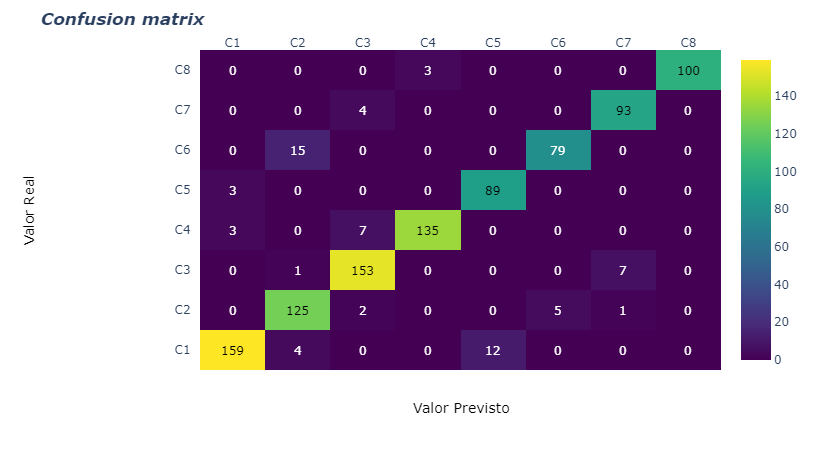

In [58]:
confusion_matrix = metrics.confusion_matrix(df_teste['label'], df_teste['label_pred'])
confusion_matrix = confusion_matrix.astype(int)
plot_confusion_matrix(confusion_matrix)

In [59]:
df_teste['label_pred']=labelencoder.inverse_transform(df_teste['label_pred'])
df_teste['label']=labelencoder.inverse_transform(df_teste['label'])

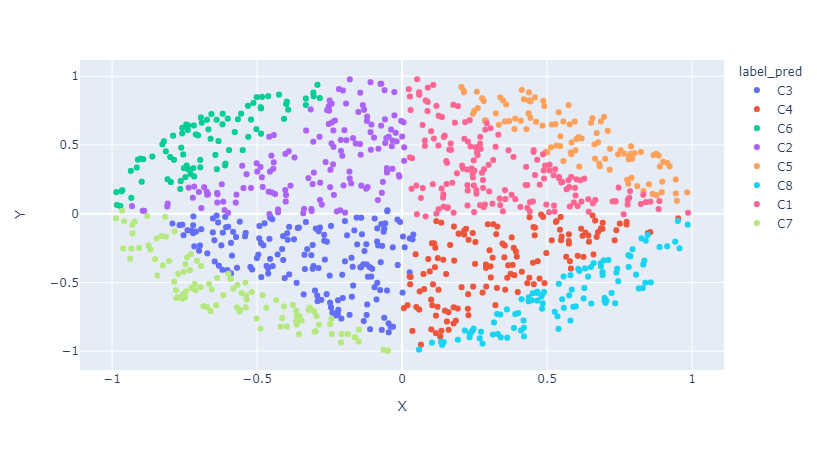

In [60]:
fig2 = px.scatter(df_teste,x='X',y='Y',color='label_pred')
fig2.show()

### Passo 3: Testes, gráficos e brincadeiras... hahaha

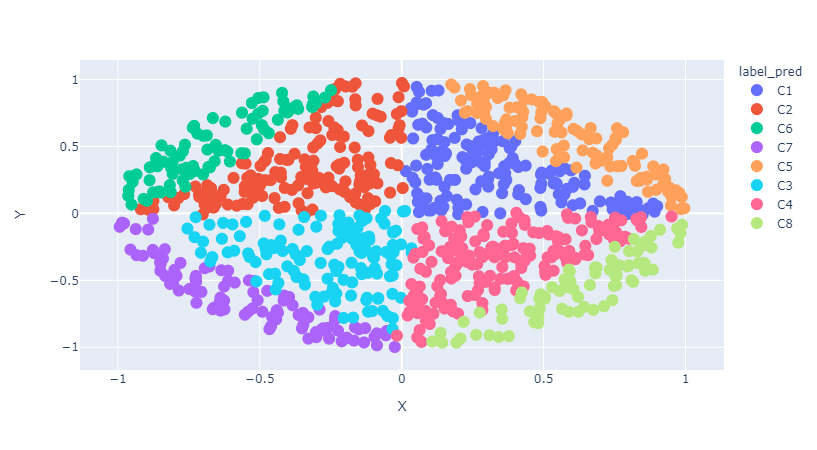

In [62]:
lista_teste = gerar_pontos(1000)
df_teste = rotular_pontos(lista_teste)
X_teste=df_teste.iloc[:,0:2]
y_pred = model.predict(X_teste)
y_pred_class = np.argmax(y_pred, axis=1)
df_teste['label_pred'] = y_pred_class
df_teste['label']=labelencoder.fit_transform(df_teste['label'])
df_teste['label_pred']=labelencoder.inverse_transform(df_teste['label_pred'])
df_teste['label']=labelencoder.inverse_transform(df_teste['label'])
fig2 = px.scatter(df_teste,x='X',y='Y',color='label_pred')
fig2.update_traces(marker=dict(size=12))
fig2.show()

Hehehe... parece que não ficou tão bom assim...
Alternativas para ajustar melhor o modelo:

 - Aumentar a quantidade de dados de treino
 - Arquiteturar uma RNA mais profunda ou com mais neurônios em suas camadas ocultas
 - Mudar os métodos de otimização da rede (Foi utilizado o Adam, poderiamos usar L-BFGS por exemplo, método de Newton ou algum Quasi-Newton mais potente)
 - Alterar a função de ativação (foi utilizada ReLU na camada oculta, mas poderiamos utilizar sigmóide, tangente hiperbólica ou alguma outra conhecida)
 - Aumentar o tempo de treino (talvez 10 epochs seja muito pouco para a rede aprender)

### Aumentando o tempo de treino

In [63]:
model.fit(X, y_train, verbose=1, epochs=50)

Epoch 1/50
313/313 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.9363
Epoch 2/50
313/313 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.9459
Epoch 3/50
313/313 [==============================] - 0s 919us/step - loss: 0.3943 - accuracy: 0.9539
Epoch 4/50
313/313 [==============================] - 0s 973us/step - loss: 0.3677 - accuracy: 0.9573
Epoch 5/50
313/313 [==============================] - 0s 933us/step - loss: 0.3447 - accuracy: 0.9617
Epoch 6/50
313/313 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.9668
Epoch 7/50
313/313 [==============================] - 0s 938us/step - loss: 0.3070 - accuracy: 0.9668
Epoch 8/50
313/313 [==============================] - 0s 883us/step - loss: 0.2910 - accuracy: 0.9675
Epoch 9/50
313/313 [==============================] - 0s 959us/step - loss: 0.2772 - accuracy: 0.9723
Epoch 10/50
313/313 [==============================] - 0s 937us/step - loss: 0.2645 - ac

In [67]:
lista_teste = gerar_pontos(1000)
df_teste = rotular_pontos(lista_teste)
X_teste=df_teste.iloc[:,0:2]
y_pred = model.predict(X_teste)
y_pred_class = np.argmax(y_pred, axis=1)
df_teste['label_pred'] = y_pred_class
df_teste['label']=labelencoder.fit_transform(df_teste['label'])

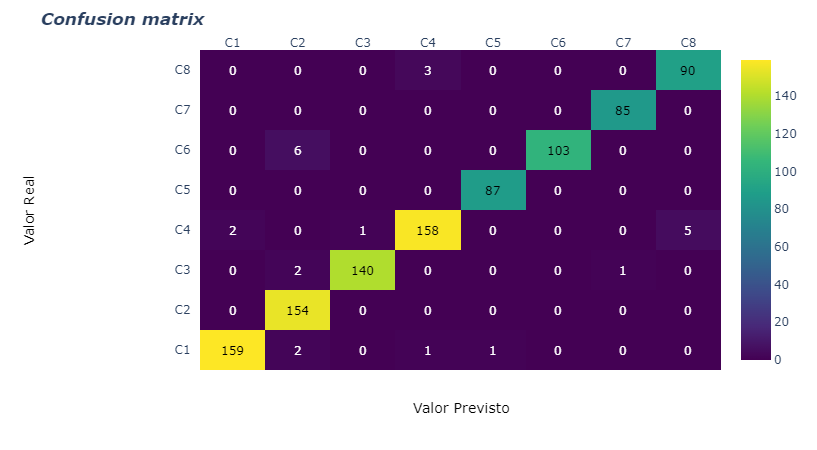

In [68]:
confusion_matrix = metrics.confusion_matrix(df_teste['label'], df_teste['label_pred'])
confusion_matrix = confusion_matrix.astype(int)
plot_confusion_matrix(confusion_matrix)

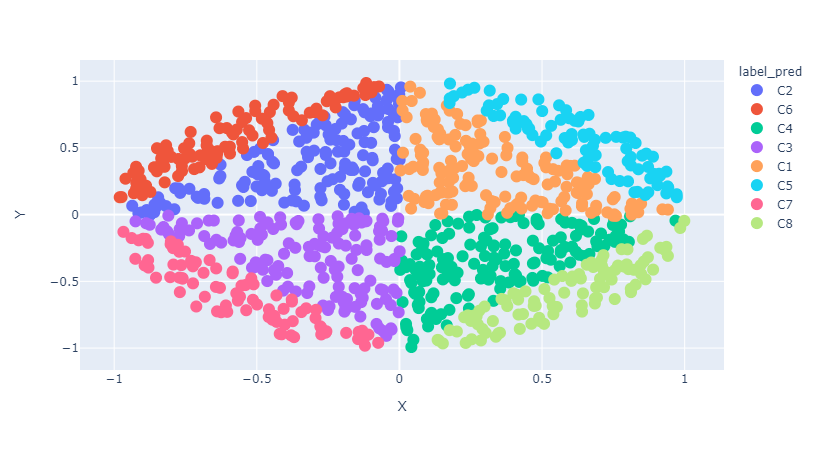

In [69]:
df_teste['label_pred']=labelencoder.inverse_transform(df_teste['label_pred'])
df_teste['label']=labelencoder.inverse_transform(df_teste['label'])
fig2 = px.scatter(df_teste,x='X',y='Y',color='label_pred')
fig2.update_traces(marker=dict(size=12))
fig2.show()

In [70]:
erros = np.where((df_teste['label'] != df_teste['label_pred']),1,0)
erro_percentual = (erros.sum()/len(erros))*100
print(f"Percentual de erros do modelo no conjunto de teste: {round(erro_percentual,2)}%")

Percentual de erros do modelo no conjunto de teste: 2.4%


### Aumentando a quantidade de Dados

In [71]:
lista = gerar_pontos(50000)
df = rotular_pontos(lista)
X=df.iloc[:,0:2]
y=df['label']
y=labelencoder.fit_transform(y)
y_train = tf.keras.utils.to_categorical(y, num_classes=8)
model.fit(X, y_train, verbose=1, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 1s 928us/step - loss: 0.1061 - accuracy: 0.9864
Epoch 2/10
1563/1563 [==============================] - 1s 916us/step - loss: 0.1006 - accuracy: 0.9871
Epoch 3/10
1563/1563 [==============================] - 1s 941us/step - loss: 0.0959 - accuracy: 0.9876
Epoch 4/10
1563/1563 [==============================] - 1s 949us/step - loss: 0.0918 - accuracy: 0.9885
Epoch 5/10
1563/1563 [==============================] - 2s 977us/step - loss: 0.0881 - accuracy: 0.9881
Epoch 6/10
1563/1563 [==============================] - 2s 976us/step - loss: 0.0848 - accuracy: 0.98910s - loss: 0.085
Epoch 7/10
1563/1563 [==============================] - 2s 970us/step - loss: 0.0819 - accuracy: 0.9893
Epoch 8/10
1563/1563 [==============================] - 2s 962us/step - loss: 0.0792 - accuracy: 0.9901
Epoch 9/10
1563/1563 [==============================] - 2s 966us/step - loss: 0.0768 - accuracy: 0.98960s - loss: 0.0770 - accuracy: 0.
Epoch 10/10
1563

In [72]:
lista_teste = gerar_pontos(1000)
df_teste = rotular_pontos(lista_teste)
X_teste=df_teste.iloc[:,0:2]
y_pred = model.predict(X_teste)
y_pred_class = np.argmax(y_pred, axis=1)
df_teste['label_pred'] = y_pred_class
df_teste['label']=labelencoder.fit_transform(df_teste['label'])

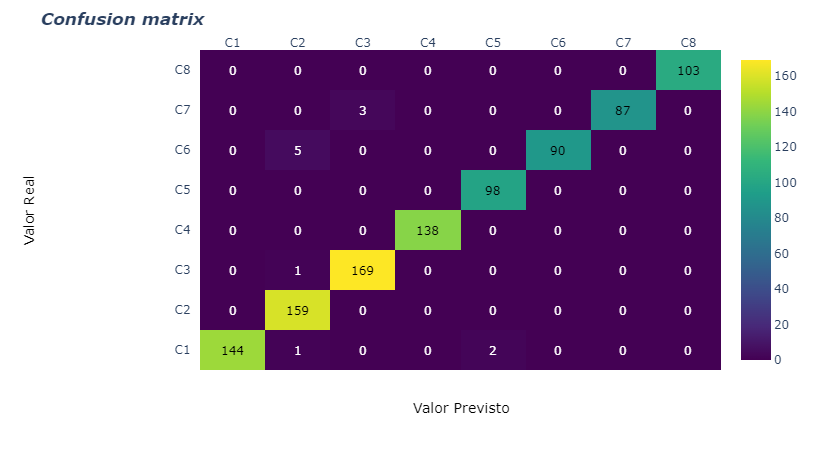

In [73]:
confusion_matrix = metrics.confusion_matrix(df_teste['label'], df_teste['label_pred'])
confusion_matrix = confusion_matrix.astype(int)
plot_confusion_matrix(confusion_matrix)

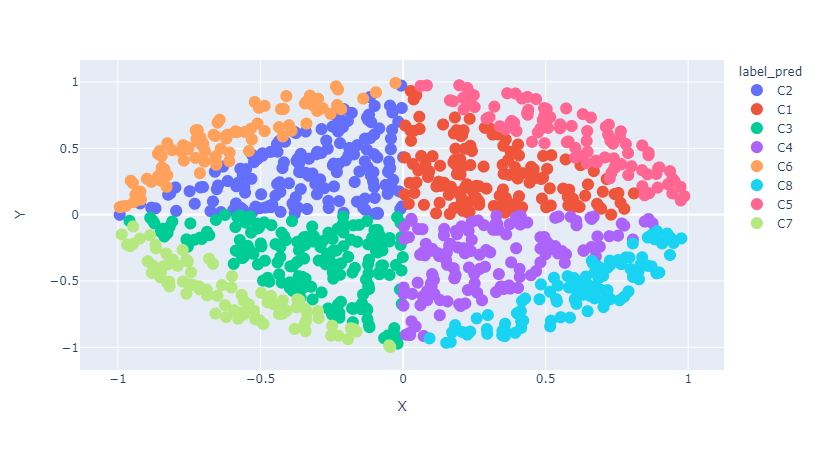

In [74]:
df_teste['label_pred']=labelencoder.inverse_transform(df_teste['label_pred'])
df_teste['label']=labelencoder.inverse_transform(df_teste['label'])
fig2 = px.scatter(df_teste,x='X',y='Y',color='label_pred')
fig2.update_traces(marker=dict(size=12))
fig2.show()

In [75]:
erros = np.where((df_teste['label'] != df_teste['label_pred']),1,0)
erro_percentual = (erros.sum()/len(erros))*100
print(f"Percentual de erros do modelo no conjunto de teste: {round(erro_percentual,2)}%")

Percentual de erros do modelo no conjunto de teste: 1.2%


### Alterando a arquitetura da RNA

In [76]:
def baseline_model():
	# create model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dropout(.2, input_dim=2))
    model.add(tf.keras.layers.Dense(8, activation='tanh'))
    model.add(tf.keras.layers.Dense(8, activation='tanh'))
    model.add(tf.keras.layers.Dense(8, activation='softmax'))
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    return model

model = baseline_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dense_4 (Dense)             (None, 8)                 24        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


In [77]:
lista = gerar_pontos(10000)
df = rotular_pontos(lista)
X=df.iloc[:,0:2]
y=df['label']
y=labelencoder.fit_transform(y)
y_train = tf.keras.utils.to_categorical(y, num_classes=8)
model.fit(X, y_train, verbose=1, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 995us/step - loss: 1.8040 - accuracy: 0.3172
Epoch 2/10
313/313 [==============================] - 0s 997us/step - loss: 1.3590 - accuracy: 0.4991
Epoch 3/10
313/313 [==============================] - 0s 1ms/step - loss: 1.1520 - accuracy: 0.5161
Epoch 4/10
313/313 [==============================] - 0s 1ms/step - loss: 1.0674 - accuracy: 0.5477
Epoch 5/10
313/313 [==============================] - 0s 1ms/step - loss: 1.0144 - accuracy: 0.5933
Epoch 6/10
313/313 [==============================] - 0s 1ms/step - loss: 0.9802 - accuracy: 0.5952
Epoch 7/10
313/313 [==============================] - 0s 1ms/step - loss: 0.9628 - accuracy: 0.6055
Epoch 8/10
313/313 [==============================] - 0s 993us/step - loss: 0.9449 - accuracy: 0.6102
Epoch 9/10
313/313 [==============================] - 0s 1ms/step - loss: 0.9276 - accuracy: 0.6091
Epoch 10/10
313/313 [==============================] - 0s 976us/step - loss: 0.9202 - accuracy

In [78]:
lista_teste = gerar_pontos(1000)
df_teste = rotular_pontos(lista_teste)
X_teste=df_teste.iloc[:,0:2]
y_pred = model.predict(X_teste)
y_pred_class = np.argmax(y_pred, axis=1)
df_teste['label_pred'] = y_pred_class
df_teste['label']=labelencoder.fit_transform(df_teste['label'])

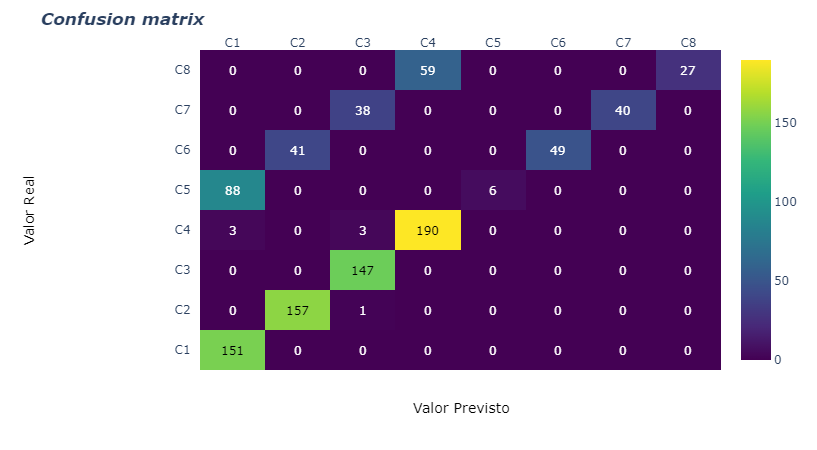

In [79]:
confusion_matrix = metrics.confusion_matrix(df_teste['label'], df_teste['label_pred'])
confusion_matrix = confusion_matrix.astype(int)
plot_confusion_matrix(confusion_matrix)

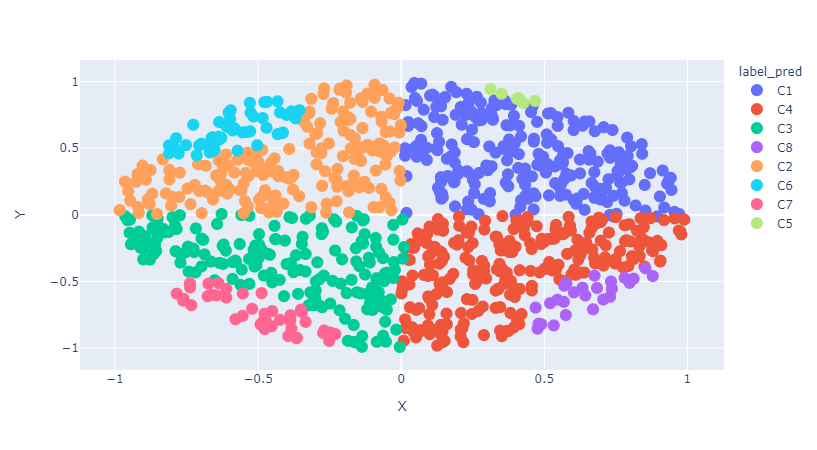

In [80]:
df_teste['label_pred']=labelencoder.inverse_transform(df_teste['label_pred'])
df_teste['label']=labelencoder.inverse_transform(df_teste['label'])
fig2 = px.scatter(df_teste,x='X',y='Y',color='label_pred')
fig2.update_traces(marker=dict(size=12))
fig2.show()

In [81]:
erros = np.where((df_teste['label'] != df_teste['label_pred']),1,0)
erro_percentual = (erros.sum()/len(erros))*100
print(f"Percentual de erros do modelo no conjunto de teste: {round(erro_percentual,2)}%")

Percentual de erros do modelo no conjunto de teste: 23.3%


É... mexer na arquitetura pode ser mais complicado do que parece hahahah...